In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
case_oppertunity = pd.read_csv('/Users/h1zhen/Documents/UW/Capstone/0509/case_oppertunities.csv')
print(case_oppertunity.shape)
print(case_oppertunity.columns)
print(case_oppertunity['ACCOUNTKEY'].nunique())
print(case_oppertunity['CASE_NUMBER'].nunique())

(183669, 35)
Index(['Unnamed: 0', 'STATUS', 'PRIORITY', 'IMPACT', 'ORIGIN', 'PRODUCT',
       'CATEGORY', 'SUBCATEGORY', 'CREATED_DATE', 'CLOSED_DATE',
       'CASE_CLOSED_REASON', 'RECORDTYPE', 'CASE_NUMBER', 'ACCOUNTKEY',
       'ACCOUNTTYPE', 'ACCOUNTTYPEDETAIL', 'EMPLOYEECOUNT', 'THEATER',
       'SUBREGION', 'SEGMENT', 'SUBSEGMENT', 'Tenure', 'Zero.Revenue.Flag',
       'Einstein Analytics', 'Role Based - Online', 'Server', 'Saas',
       'Role Based - On Prem', 'Services', 'Desktop', 'Role Based - NonProd',
       'Other', 'CLOSEDATE', 'ISWON', 'ISPARTNERRELATED'],
      dtype='object')
28348
183669


In [3]:
recent_opp_act = case_oppertunity.sort_values('CLOSEDATE', ascending=False).drop_duplicates('ACCOUNTKEY')
recent_opp_act['total_acv'] = recent_opp_act[['Einstein Analytics', 'Role Based - Online',
                                              'Server', 'Saas', 'Role Based - On Prem',
                                              'Services', 'Desktop', 'Role Based - NonProd']].sum()
print(recent_opp_act.shape)

(28348, 36)


In [13]:
recent_opp_binary = recent_opp_act
recent_opp_act['Einstein Analytics'] = np.where(recent_opp_act['Einstein Analytics'] > 0, 1, 0)
recent_opp_act['Server'] = np.where(recent_opp_act['Server'] > 0, 1, 0)
recent_opp_act['Saas'] = np.where(recent_opp_act['Saas'] > 0, 1, 0)
recent_opp_act['Role Based - On Prem'] = np.where(recent_opp_act['Role Based - On Prem'] > 0, 1, 0)
recent_opp_act['Role Based - Online'] = np.where(recent_opp_act['Role Based - Online'] > 0, 1, 0)
recent_opp_act['Services'] = np.where(recent_opp_act['Services'] > 0, 1, 0)
recent_opp_act['Desktop'] = np.where(recent_opp_act['Desktop'] > 0, 1, 0)
recent_opp_act['Role Based - NonProd'] = np.where(recent_opp_act['Role Based - NonProd'] > 0, 1, 0)
recent_opp_act['Other'] = np.where(recent_opp_act['Other'] > 0, 1, 0)
print(recent_opp_act.head())

        Unnamed: 0                  STATUS PRIORITY             IMPACT  \
179123      179123  Confirmation Requested       P2  Minority of Users   
173514      173514                Resolved       P2  Majority of Users   
180925      180925        Pending Customer       P4  Minority of Users   
177096      177096        Pending Customer       P4  Minority of Users   
178992      178992        Pending Customer       P3  Minority of Users   

        ORIGIN          PRODUCT                    CATEGORY  \
179123   Other  Tableau Desktop                        APIs   
173514     Pro   Tableau Server                   Licensing   
180925  Portal  Tableau Desktop  Connect and work with data   
177096  Portal   Tableau Server              Visualizations   
178992  Portal   Tableau Server                        APIs   

                       SUBCATEGORY     CREATED_DATE          CLOSED_DATE  ...  \
179123  Python Integration (TabPy)   3/9/2022 19:22  2022-03-27 18:39:00  ...   
173514        

In [4]:
# read topic data generated with topic modeling
topics = pd.read_csv('/Users/h1zhen/Documents/UW/Capstone/0509/Topic_cohort.csv')
print(topics)

     Topic 1  Topic 2    Topic 3   Topic 4  Topic 5
0        pii     name  dashboard     error  tableau
1       user      pii        use   connect   server
2      error    email        can      data      run
3    version    pleas       show       tri   servic
4       site   licens       view      issu   upgrad
5        set    https        one   desktop      tsm
6        use    thank       like     sourc     node
7        log  tableau       user      work      log
8     instal      key       step       get     file
9       fail    activ      chang   extract    start
10  configur      can     filter  workbook   status
11    follow      url       want   refresh   instal
12       get     team        see   publish     prep
13   request  support      creat     unabl  process
14      file  product       will       abl   window
15      info     help       need    access     fail
16     https     need       tabl    attach     stop
17     login   regard     report     onlin    error
18   authent

In [5]:
# read case data
case_text = pd.read_csv('/Users/h1zhen/Downloads/support_cases_text_fact.csv')
case_text = case_text[["CASE_NUMBER", "DESCRIPTION"]]

# drop empty text boxes
case_text.dropna(subset = ["DESCRIPTION"], inplace=True)

print(case_text.shape)

(203367, 2)


In [6]:
# subest the DESCRIPTION column for text analysis
test = case_text["DESCRIPTION"].iloc[:,]

In [7]:
def assign_cohort(x):
    """
    For each case, calculate the word occurence of each topic. 
    
    :param x: list, text data
    :return: list, flags for each case
    """
    topic_flag = []
    for i in range(len(x)):
        line = x.iloc[i,]
        topic_dict = {}
        
        # loop over five topics
        for j in range(0,5):
            topic_count = 0
            
            # loop over 20 words in a topic
            for word in topics.iloc[:, j]:
                if word in line:
                        topic_count += 1
                    
            # select the topic with most words appeared in the line
            topic_index = str(j+1)
            topic_dict[topic_index] = topic_count
        # print(topic_dict)
        chosen_topic = int(max(topic_dict, key=topic_dict.get))
        topic_flag.append(chosen_topic)
            
    return(topic_flag)
            

In [8]:
# assign flags to each case
flags4context = assign_cohort(test)

In [9]:
# create cohort flags for each case_number
case_text['flag'] = flags4context
cleaned_case_text = case_text[["CASE_NUMBER", "flag"]]
cleaned_case_text.tail(10)

,CASE_NUMBER,flag
205051,6950055a4f149a8d3194f33310063fe3,4
205052,640ca5a4dde71d987b8cdd8eca327207,4
205053,c58f8bff762c204f438f9a715bb2c660,1
205054,55c0ae985b7611e3f20e8e1dec5f4d22,5
205055,3d4dc6de79e97a6a858dfecf3ed325c7,2
205056,2bbd11d460537f355489dcd72180cf75,1
205057,c3a407a808ef68fbe843a4ff1ecea4a4,3
205058,75c6f03cac6ccd0ee6c31e4030e195f4,4
205059,937693f3c3f72c639421056f0e2db2b4,4
205060,060ebf0bcb09016a71b66e50bf146d44,5


In [14]:
# Merge case's flag to opportunity data
new_recent_opp_binary = recent_opp_binary.merge(cleaned_case_text, on='CASE_NUMBER', how='inner')
new_recent_opp_binary.tail(2)

,Unnamed: 0,STATUS,PRIORITY,IMPACT,ORIGIN,PRODUCT,CATEGORY,SUBCATEGORY,CREATED_DATE,CLOSED_DATE,...,Role Based - On Prem,Services,Desktop,Role Based - NonProd,Other,CLOSEDATE,ISWON,ISPARTNERRELATED,total_acv,flag
27904,76431,Closed,P3,Majority of Users,Web,Tableau Desktop,Data Connectivity,Connecting to Data,2/17/2020 0:10,2020-02-18 17:42:00,...,0,0,0,0,0,0,0.0,0.0,NaN,2
27905,76424,Resolved,P3,Minority of Users,Web,Tableau Prep,Connecting to Data,None,2/17/2020 0:05,2020-02-18 17:18:00,...,0,0,0,0,0,0,0.0,0.0,NaN,5


In [15]:
# create dummies for products
new_recent_opp_binary = new_recent_opp_binary
new_recent_opp_binary['Einstein Analytics'] = np.where(new_recent_opp_binary['Einstein Analytics'] > 0, 1, 0)
new_recent_opp_binary['Server'] = np.where(new_recent_opp_binary['Server'] > 0, 1, 0)
new_recent_opp_binary['Saas'] = np.where(new_recent_opp_binary['Saas'] > 0, 1, 0)
new_recent_opp_binary['Role Based - On Prem'] = np.where(new_recent_opp_binary['Role Based - On Prem'] > 0, 1, 0)
new_recent_opp_binary['Role Based - Online'] = np.where(new_recent_opp_binary['Role Based - Online'] > 0, 1, 0)
new_recent_opp_binary['Services'] = np.where(new_recent_opp_binary['Services'] > 0, 1, 0)
new_recent_opp_binary['Desktop'] = np.where(new_recent_opp_binary['Desktop'] > 0, 1, 0)
new_recent_opp_binary['Role Based - NonProd'] = np.where(new_recent_opp_binary['Role Based - NonProd'] > 0, 1, 0)
new_recent_opp_binary['Other'] = np.where(new_recent_opp_binary['Other'] > 0, 1, 0)
print(new_recent_opp_binary.head())

   Unnamed: 0                  STATUS PRIORITY             IMPACT  ORIGIN  \
0      179123  Confirmation Requested       P2  Minority of Users   Other   
1      173514                Resolved       P2  Majority of Users     Pro   
2      180925        Pending Customer       P4  Minority of Users  Portal   
3      177096        Pending Customer       P4  Minority of Users  Portal   
4      178992        Pending Customer       P3  Minority of Users  Portal   

           PRODUCT                    CATEGORY                 SUBCATEGORY  \
0  Tableau Desktop                        APIs  Python Integration (TabPy)   
1   Tableau Server                   Licensing         Maximum activations   
2  Tableau Desktop  Connect and work with data             Connect to data   
3   Tableau Server              Visualizations           Appearance issues   
4   Tableau Server                        APIs                      TABCMD   

      CREATED_DATE          CLOSED_DATE  ... Role Based - On Prem Se

In [16]:
# calculate the cohort size
cohort_size = [len(new_recent_opp_binary[new_recent_opp_binary['flag'] == 1]),
               len(new_recent_opp_binary[new_recent_opp_binary['flag'] == 2]),
               len(new_recent_opp_binary[new_recent_opp_binary['flag'] == 3]),
               len(new_recent_opp_binary[new_recent_opp_binary['flag'] == 4]),
               len(new_recent_opp_binary[new_recent_opp_binary['flag'] == 5])]
print(cohort_size)

[6047, 4531, 4609, 9695, 3024]


In [17]:
# summarize the number of each product used for cohorts
summary = new_recent_opp_binary.groupby('flag').sum()[['Einstein Analytics', 'Role Based - Online',
                                              'Server', 'Saas', 'Role Based - On Prem',
                                              'Services', 'Desktop', 'Role Based - NonProd', 'Other']]

print(summary)

      Einstein Analytics  Role Based - Online  Server  Saas  \
flag                                                          
1                    123                  637     123    10   
2                     68                  383      70     6   
3                    112                  574      88    13   
4                    203                 1265     198    27   
5                     77                  130      80     1   

      Role Based - On Prem  Services  Desktop  Role Based - NonProd  Other  
flag                                                                        
1                     1257        44       90                     2      7  
2                      838        26       78                     1      5  
3                      879        43       88                     1      6  
4                     1813        91      136                     2      5  
5                      849        46       51                     1      1  


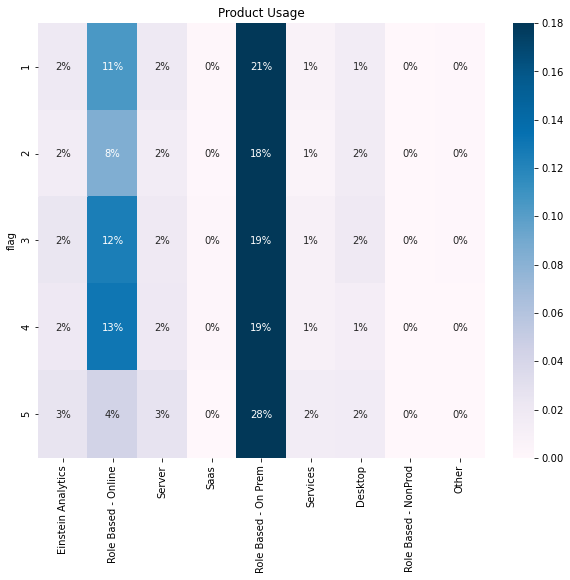

In [23]:
# display product usage 
product_use = summary.divide(cohort_size, axis=0)
product_use.round(decimals=3)
plt.figure(figsize=(10,8))
plt.title('Product Usage')
sns.heatmap(data=product_use, 
            annot= True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.18,
            cmap='PuBu')
plt.show()